In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import warnings

# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

In [61]:
df_victimas = pd.read_excel('Datasets\homicidios.xlsx',sheet_name = 'VICTIMAS')

df_victimas.head(10)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
6,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
7,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18,2016-01-29 00:00:00
8,2016-0012,2016-02-08,2016,2,8,CONDUCTOR,MOTO,MASCULINO,22,2016-02-08 00:00:00
9,2016-0013,2016-02-10,2016,2,10,PEATON,PEATON,MASCULINO,16,2016-02-10 00:00:00


Observamos 10 columnas que cotienen la informacion de las victimas de los siniestros-

* ID_hecho: Identifica el siniestro
* FECHA: Fecha completa del día del siniestro
* AAAA, MM, DD	que es la fecha desagregada
* ROL: El papel que desempeñado en el momento del siniestro
* VICTIMA: El afectato en el siniestro
* SEXO: Identifica el género
* EDAD: La edad de la víctima
* FECHA_FALLECIMIENTO: Fecha del deceso

In [62]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [63]:
df_victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


Como podemos observar no tenemos nulos, pero la columna **EDAD** que debería ser tipo númerico es un tipo *object* entonces se procedera a revisarla y hacerle la conversión

In [64]:
df_victimas['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

Como podemos ver en **EDAD** encontramos registros 'SD' que significa(Sin Dato), procedere a imputar este valor usando la media de la edad 

In [65]:
# Convertir toda la columna a numerica
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')

#Imputar los nulos con la media
df_victimas['EDAD'].replace(np.nan, round(np.mean(df_victimas['EDAD']),0), inplace= True)


Continuando con la edad se procederá a realizar un histograma.

Text(0, 0.5, 'Cantidad de víctimas')

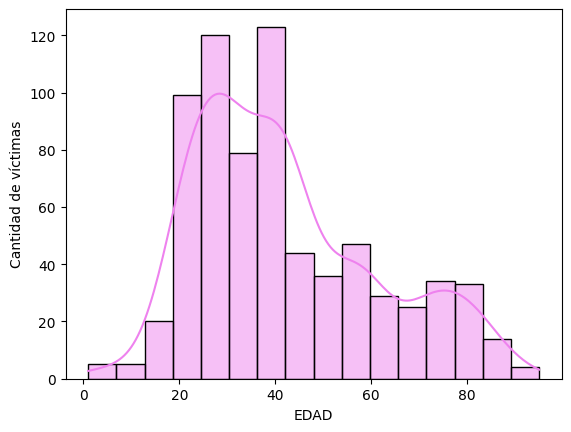

In [66]:
sns.histplot(df_victimas['EDAD'], kde=True,color='violet')
plt.ylabel('Cantidad de víctimas')

Podemos observar que la mayor contidad de víctimas esta comprendida entre los 20 años a los 40 años.Esta población será de gran importacia a la hora de generar una campaña de concientización y un objectivo por parte de las entidades gubernamentales.  

Ahora veremos el sexo de las víctimas

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

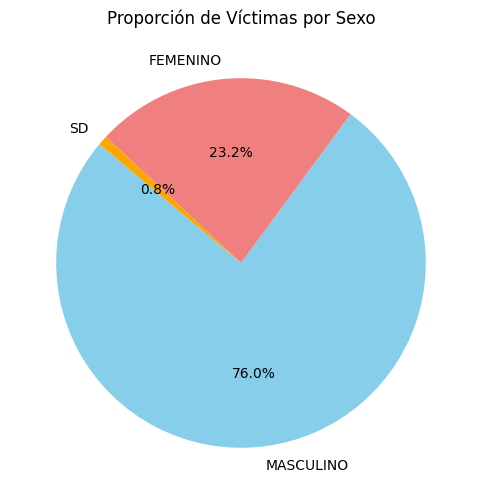

In [67]:
# Calcular la proporción de víctimas por sexo
proporcion = df_victimas['SEXO'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral','orange'])
plt.title('Proporción de Víctimas por Sexo')

Podemos ver que la mayor cantidad de víctimas las aportan los hombres con un 76%, esto se debe a que dicho sexo es la que contiene la mayor parte del parque automotor y también a que son los que manejan a velocidades mucho más altas.

Ahora veremos varia distribuciones, primero observaremos la distribucion de ROL por SEXO y luego VICTIMA por SEXO. 

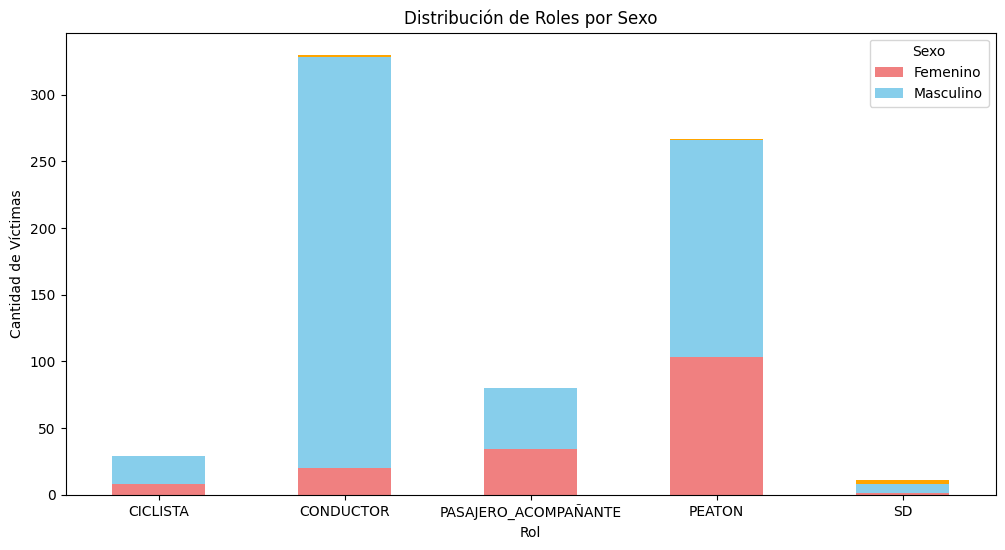

In [68]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df_victimas['ROL'], df_victimas['SEXO'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue','orange'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Cantidad de Víctimas')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

Observando la distribución por roles de las víctimas vemos que: 

* En la mayor cantidad de siniestros, las víctimas tienen como rol Conductor, seguida por Peatón.
* Para las víctimas de sexo Másculino, el rol más frecuente en los siniestros es como conductor, seguido por peatón.
* para las víctimas de sexo Femenino, el rol más frecuente en los siniestros es como peatón, seguido por pasajero-acompañante.

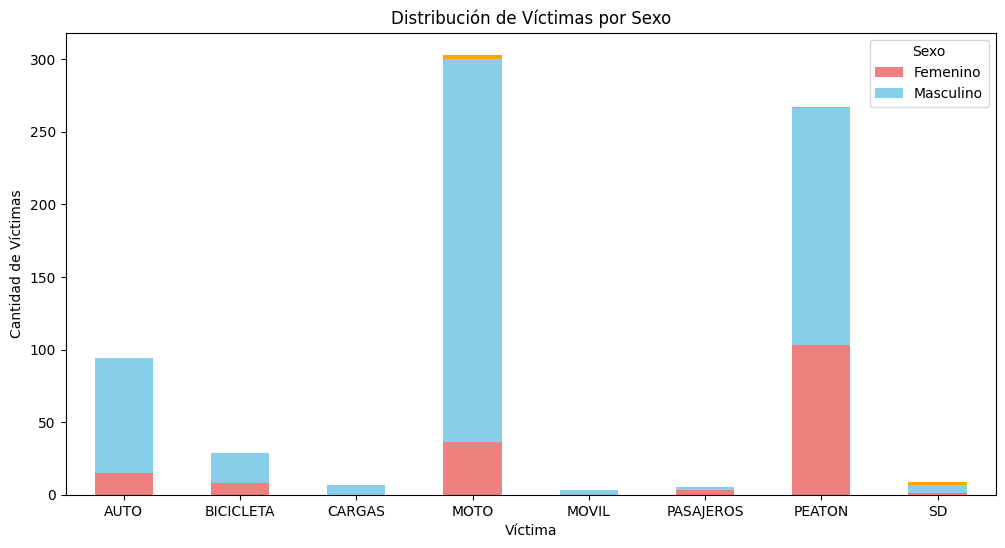

In [52]:
# Crear una tabla de contingencia para la columna VICTIMA
tabla_contingencia = pd.crosstab(df_victimas['VICTIMA'], df_victimas['SEXO'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue','orange'])
plt.title('Distribución de Víctimas por Sexo')
plt.xlabel('Víctima')
plt.ylabel('Cantidad de Víctimas')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

La mayor cantidad de víctimas las aportan las motos, siguen como víctimas los peatones que lastimosamente aportan mucho y aquí podemos ver que no hay mucha diferencia entre hombres y mujeres y la tercer fuente son los autos que solo representan un 4% de los pricipales sistemas de transporte de CABA según el *Plan de Seguridad Vial de la Ciudad 2016-2019*, es de especial atención enfocar esfuerzos gubernamentales en infrastructura segura para el peaton y los ocupantes de medios de transporte como las bicicletas que pese al poco número que circulan tiene una triste representacion en la cantidad de víctimas. 

Por último mirare la cantidad cantidad de duplicados. 

In [70]:
df_victimas['ID_hecho'].duplicated().sum()

21

Podemos ver que la columna **ID_hecho** tiene 21 duplicados pero esto no es de extrañar ya que en un siniestro vial puede ver más de una víctima y el registro se toma por cada victima del siniestro

Procederé a guardar los datos en formato csv

In [57]:
df_victimas.to_csv('victimas.csv')